In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import os
import openai
import tiktoken
from retry import retry
openai.api_key_path = os.path.join("./secretkey.txt")

/Users/phbd/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
enc = tiktoken.encoding_for_model("gpt-3.5-turbo")
possible_nums=range(1,11) # int from 1 to 10
possible_tokens = {f"{enc.encode(f'{i}')[0]}": 100 for i in possible_nums} 

In [9]:
with open('secretkey.txt', 'r') as f:
    secret=f.readline()

import openai_async

async def generateRating(metrics):
        #get the summary column of the last entry in the table

        completion = await openai_async.chat_complete(
                            os.getenv("OPENAI_API_KEY"),
                            timeout=60,
                            payload={
                                "model":"gpt-3.5-turbo",
                                "messages":[{"role": "user", "content": "generate a random number"}],
                                "temperature":0,
                                "max_tokens":10
                            },
        )     
        

        #get the column "chatname" of the last entry in the table
        
        res=completion.json()['choices'][0]['message']['content']
        
        #strip spaces and lowercase the response
        res=res.strip().lower()
        return res



<Response [404 Not Found]>


In [11]:
# @retry(tries=10, delay=3)
def random_number_generator() -> str:
    numba=openai.ChatCompletion.create(
        model='gpt-3.5-turbo',
        messages=[{
            'role': 'user',
            'content': 'Pick a random number from 1-10'
        }],
        logit_bias=possible_tokens,
        max_tokens=1,
        temperature=0.7).choices[0].message.content
    print(numba)
    return numba
print(random_number_generator())

In [12]:
# random_numbers = [random_number_generator() for i in range(5)]

ValueError: Malformed API key in /Users/phbd/Downloads/7551194ecb9b0a0a31cffb23b66c3919/secretkey.txt.

In [ ]:
print(random_numbers)

In [24]:
import pandas as pd

df_random_numbers = pd.DataFrame()
df_random_numbers["random_numbers"] = [int(random_numbers[i]) for i in range(1000)]

In [25]:
df_random_numbers.to_csv("random.csv", index=False)

In [26]:
import seaborn as sns

In [28]:
from collections import Counter

In [31]:
serie_rn = pd.Series(Counter(list(df_random_numbers["random_numbers"])))

In [43]:
serie_rn_pct = 100*serie_rn/1000

In [65]:
df = pd.DataFrame()
df['number'] = serie_rn.index
df['counter'] = serie_rn.values

In [75]:
df_final = pd.DataFrame()
df_final["number"] = [i for i in range(1,11)]

In [81]:
df_final = df_final.set_index("number")

In [84]:
df = df.set_index("number")

In [86]:
df_final["counters"] = df["counter"]

In [90]:
df_final = df_final.fillna(0)

In [93]:
df_final["counters"] = df_final["counters"].astype(int)

In [102]:
df_final["counters_percentage"] = 100*df_final["counters"]/1000

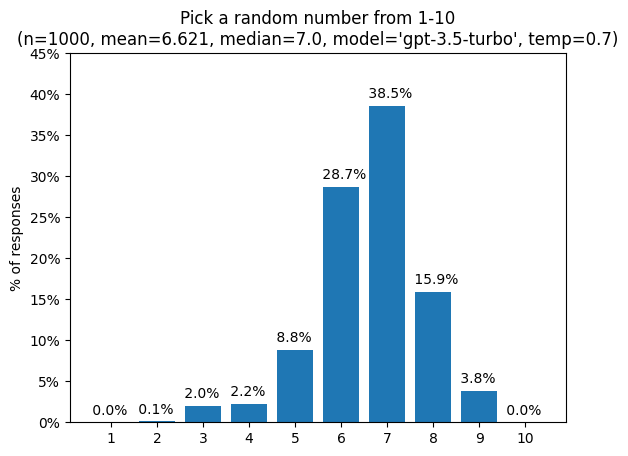

In [117]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = [i for i in range(1,11)]
y = [serie_rn_pct[i] if i in serie_rn_pct.index else 0 for i in range(1,11)]
ax.bar(x, y)
for i, val in enumerate(df_final["counters_percentage"]):
    ax.text(i+.5, val+1, f" {val:.1f}%")
ax.set_title(f"Pick a random number from 1-10\n(n=1000, mean={np.mean(df_random_numbers['random_numbers'])}, median={np.median(df_random_numbers['random_numbers'])}, model='gpt-3.5-turbo', temp=0.7)")
ax.set_xticks([i for i in range(1,11)])
ax.set_yticks([5*i for i in range(10)])
ax.set_yticklabels([f"{5*i}%" for i in range(10)])
ax.set_ylabel("% of responses")
plt.savefig(f"random.png", dpi=700, bbox_inches='tight', format='png')